In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../src')
from preprocessing import preprocess

In [2]:
df = preprocess("../data/raw/atp_tennis.csv")

In [3]:
df['target'] =  (df['Winner'] == df['Player_1']).astype(int)

In [ ]:
features = [
    'Odd_1',
    'Odd_2',
    'rank_diff',
    'h2h_A_wins',
    'h2h_B_wins',
    'A_Surface_winrate',
    'B_Surface_winrate',
    'streak_A',
    'streak_B'
]

X = df[features]
y = df['target']


In [7]:
df.head()

,Tournament,Date,Series,Court,Surface,Round,Best of,Player_1,Player_2,Winner,...,Odd_1,Odd_2,Score,Surface_encoded,rank_diff,h2h_A_wins,h2h_B_wins,A_Surface_winrate,B_Surface_winrate,target
0,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Dosedel S.,Ljubicic I.,Dosedel S.,...,-1.0,-1.0,6-4 6-2,0,-14,0,0,0.0,0.0,1
1,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Clement A.,Enqvist T.,Enqvist T.,...,-1.0,-1.0,3-6 3-6,0,51,0,0,0.0,0.0,0
2,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Escude N.,Baccanello P.,Escude N.,...,-1.0,-1.0,6-7 7-5 6-3,0,-615,0,0,0.0,0.0,1
3,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Knippschild J.,Federer R.,Federer R.,...,-1.0,-1.0,1-6 4-6,0,22,0,0,0.0,0.0,0
4,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Fromberg R.,Woodbridge T.,Fromberg R.,...,-1.0,-1.0,7-6 5-7 6-4,0,-117,0,0,0.0,0.0,1


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [9]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [10]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)


,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [11]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

def evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1]
    
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
    print(f"F1-score: {f1_score(y_test, y_pred):.3f}")
    print(f"ROC-AUC: {roc_auc_score(y_test, y_proba):.3f}")

print("Logistic Regression")
evaluate(log_reg, X_test, y_test)

print("\nRandom Forest")
evaluate(rf, X_test, y_test)


Logistic Regression
Accuracy: 0.697
F1-score: 0.697
ROC-AUC: 0.767

Random Forest


Accuracy: 0.679
F1-score: 0.680
ROC-AUC: 0.749


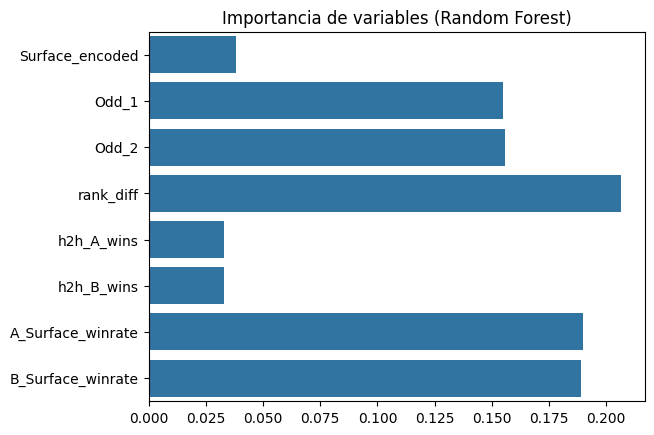

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

importances = rf.feature_importances_
sns.barplot(x=importances, y=features)
plt.title("Importancia de variables (Random Forest)")
plt.show()


In [13]:
import joblib

joblib.dump(rf, "../models/random_forest.pkl")
joblib.dump(log_reg, "../models/log_reg.pkl")


['../models/log_reg.pkl']

In [16]:
# Ejemplo: un partido hipotético
partido = pd.DataFrame([{
    'Surface_encoded':1,
    'Odd_1':1.5,
    'Odd_2':2.5,
    'rank_diff':10,
    'h2h_A_wins':5,
    'h2h_B_wins':3,
    'A_Surface_winrate':0.6,
    'B_Surface_winrate':0.4
}])

# Predicción
proba = rf.predict_proba(partido)[0][1]  # prob de que gane A
print(f"Probabilidad de que gane el jugador A: {proba:.2f}")

Probabilidad de que gane el jugador A: 0.71
